In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,GlobalMaxPooling2D,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('default')
import time

In [27]:
#getting the imag path
img_path='/Users/draculalemon/Downloads/attandeance_opENCV'

In [28]:
#now we will get the folder path
for folder_path in os.listdir(img_path):
    #joining the path
    both_img_path=os.path.join(img_path,folder_path)
    if os.path.isdir(both_img_path):
        no_of_img=len(os.listdir(both_img_path))
        print(no_of_img)

148
153


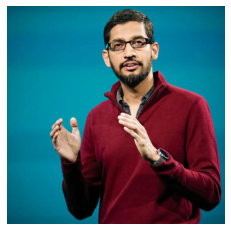

In [6]:
#now we will look of a sample image from both mask and without mask
mask=cv2.imread("/Users/draculalemon/Downloads/attandeance_opENCV/sundar1/1.jpg")
plt.imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB))
plt.axis('off');

In [29]:
IMG_height=224
IMG_WEIGHT=224
split=0.2

# datagen_train=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,
#                   rotation_range=20,fill_mode='nearest')

In [9]:
#loading the image
import glob

for pic1 in glob.glob('/Users/draculalemon/Downloads/attandeance_opENCV/sundar1/*.jpg'):
    datagen_train=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,
                  rotation_range=20,fill_mode='nearest')
    #now we will load the image and do preprocessing
    img_path=load_img(pic1)
    #img into np array
    img_array=img_to_array(img_path)
    img_array=img_array.reshape((1,)+img_array.shape) #adding 4th dimension
    # now we will do the tranformation
    i=0
    for batch in datagen_train.flow(img_array,batch_size=1,
                              save_to_dir='/Users/draculalemon/Downloads/attandeance_opENCV/sundar1',
                              save_prefix='jack_ma',save_format='jpg'):
        
        i+=1
        if i > 5:
            break
# we need to rewrite it for better optimization           

In [30]:
datagen_val=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                            validation_split=split)

In [32]:
#passing the image generator to the file or applying it
train_datagen=datagen_train.flow_from_directory(batch_size=2,directory=img_path,
                                                shuffle=True,                                             
                                                target_size=(IMG_height,IMG_WEIGHT))

validate_datagen=datagen_val.flow_from_directory(batch_size=4,
                                                directory=img_path,
                                                shuffle=True,
                                                target_size=(IMG_height,IMG_WEIGHT))

Found 301 images belonging to 2 classes.
Found 301 images belonging to 2 classes.


### Traing the model

In [33]:
# reseting the index after split
validate_datagen.reset()
train_datagen.reset()

In [41]:
print (train_datagen.class_indices)

{'jack': 0, 'sundar1': 1}


In [34]:

model=Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_height,IMG_WEIGHT,3)),
    MaxPooling2D(),
    
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    
    Conv2D(128,3,padding='same',activation='relu'),
    MaxPooling2D(),
    
    Conv2D(256,3,padding='same',activation='relu'),
    MaxPooling2D(),
    
    Conv2D(512,3,padding='same',activation='relu'),
    MaxPooling2D(),
       
    GlobalMaxPooling2D(),
    Dense(1000,activation='relu'),
    Dense(2,activation='softmax')
        
])

Metal device set to: Apple M1


2022-08-13 15:02:57.852766: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-13 15:02:57.852967: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [35]:
#using early stoping for preventing overfiting
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=6,mode='min',
                                      restore_best_weights=True)

In [36]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
start = time.time()
epoches=12
train_model=model.fit(train_datagen,
                  epochs=epoches,validation_data=validate_datagen,
                  callbacks=[early_stopping_callback])
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/12
151/151 [==============================] - 16s 106ms/step - loss: 0.3849 - accuracy: 0.8173 - val_loss: 0.5626 - val_accuracy: 0.6777
Epoch 2/12
151/151 [==============================] - 16s 104ms/step - loss: 0.4137 - accuracy: 0.8239 - val_loss: 0.2706 - val_accuracy: 0.8970
Epoch 3/12
151/151 [==============================] - 16s 104ms/step - loss: 0.3339 - accuracy: 0.8571 - val_loss: 0.3143 - val_accuracy: 0.8771
Epoch 4/12
151/151 [==============================] - 16s 102ms/step - loss: 0.4206 - accuracy: 0.8239 - val_loss: 0.3261 - val_accuracy: 0.8372
Epoch 5/12
151/151 [==============================] - 16s 105ms/step - loss: 0.5757 - accuracy: 0.7774 - val_loss: 0.3234 - val_accuracy: 0.8738
Epoch 6/12
151/151 [==============================] - 16s 104ms/step - loss: 0.3537 - accuracy: 0.8571 - val_loss: 0.2670 - val_accuracy: 0.8870
Epoch 7/12
151/151 [==============================] - 16s 104ms/step - loss: 0.3074 - accuracy: 0.8771 - val_loss: 0.2142 - val_ac

In [40]:
#saving the model
model.save('attendance_new_file.h5')